In [55]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.integrate import odeint
import seaborn as sns

In [56]:
global Eta,Kappa,Nm,NWell,MixF

In [57]:
def ARGMove(y,t):
    dydt=np.zeros(NWell*2)
    for i in range(NWell):
        dydt[i]=Eta*y[i+NWell]*y[i]-Kappa*y[i]
        dydt[i+NWell]=-Eta*y[i+NWell]*y[i]+Kappa*y[i]
    return dydt

In [58]:
def ShuffleLR(x,n):
    z=np.zeros(len(x))
    for i in range(n):
        if i==0:
            z[i]=(1-MixF)*x[i]+MixF*x[i+1]
            z[i+n]=(1-MixF)*x[i+n]+MixF*x[i+n+1]
        if i==n-1:
            z[i]=(1-MixF)*x[i]+MixF*x[i-1]
            z[i+n]=(1-MixF)*x[i+n]+MixF*x[i+n-1]
        if i>0 and i<n-1:
            z[i]=(1-2*MixF)*x[i]+MixF*x[i-1]+MixF*x[i+1]
            z[i+n]=(1-2*MixF)*x[i+n]+MixF*x[i+n-1]+MixF*x[i+n+1]
    return z

In [59]:
Kappa=0.01
Eta=0.02
NWell=10
MixF=0.2
timespan=np.arange(0,10,0.01)

Rep=20
TT=200

frac=np.zeros((TT,Rep))
Entro=np.zeros((TT,Rep))

for j in range(TT):
    Nm0=(np.random.rand(NWell,1))**(10*np.random.rand())
    Nm=Nm0/np.sum(Nm0)*NWell/2
    Initial=np.zeros(2*NWell)
    for ii in range(NWell):
        Initial[ii]=Nm[ii]*np.random.rand()
        Initial[ii+NWell]=Nm[ii]-Initial[ii]
    for i in range(Rep):
        print(i)
        y1=odeint(ARGMove,Initial,timespan)
        Plas1=y1[-1,np.arange(0,NWell,1)]
        Plas0=y1[-1,np.arange(NWell,2*NWell,1)]
        frac[j,i]=np.sum(Plas1)/(np.sum(Plas0)+np.sum(Plas1))
        temp0=Plas1+Plas0
        temp1=temp0/np.sum(temp0)
        Entro[j,i]=np.exp(np.sum(-temp1*np.log(temp1)))/NWell
        Initial=ShuffleLR(y1[-1,np.arange(0,2*NWell,1)],NWell)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


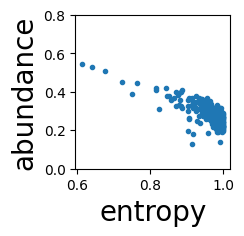

In [60]:
plt.figure(figsize=(2,2))
plt.plot(Entro[:,-1],frac[:,-1],'o',markersize=3)
#plt.yscale('log')
plt.ylim(0,0.8)
plt.xlabel('entropy',fontsize=20)
plt.ylabel('abundance',fontsize=20)
plt.savefig('Simulations_02.pdf')
plt.show()